🔵 Importing necessary librarires

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import re # for using regex function.
style.use('ggplot') # ggplot is a Python implementation of the grammar of graphics.


from nltk.tokenize import word_tokenize # it will help us split a text into tokens.
from nltk.stem import WordNetLemmatizer # it is used to analyze the meaning behind a word.
                                        # Stemming uses the stem , while lemmatization uses the context in which the word is being used.

from nltk.corpus import stopwords # it is used for removing the stopwords (such as “the”, “a”, “an”, “in”).
stop_words = set(stopwords.words('english'))


from sklearn.feature_extraction.text import TfidfVectorizer # it is used to vectorize thr text documents.


🟠 Loading the data

In [30]:
tweet_df = pd.read_csv('train.csv')

In [31]:
tweet_df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [32]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [33]:
def text_processing(tweet):
  
  tweet = tweet.lower() # to convert upper case letters into lower case.
  tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE) # for removing the url using regex.
  tweet = re.sub(r'\@w+|#', '', tweet)
  tweet = re.sub(r'ð', '', tweet)
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tokenize = word_tokenize(tweet)
  tweet_filter = [w for w in tokenize if not w in stop_words]

  return " ".join(tweet_filter)


In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
tweet_df.tweet = tweet_df['tweet'].apply(text_processing) 

In [36]:
tweet_df = tweet_df.drop_duplicates('tweet') # dropping the duplicates tweets

In [37]:
lemmatizer = WordNetLemmatizer()
def lmtz(data):
  tweet = [lemmatizer.lemmatize(word) for word in data]
  return data

In [38]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lmtz(x))

In [40]:
tweet_df.head(5)

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [41]:
tweet_df['label'].value_counts()

0    27352
1     1993
Name: label, dtype: int64

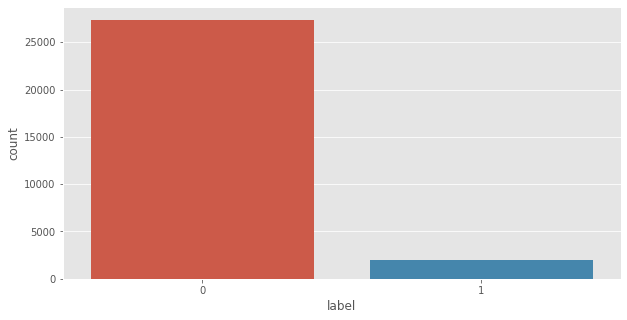

In [42]:
# count plot

fig_1 = plt.figure(figsize = (10, 5))
sns.countplot(x = 'label', data = tweet_df)

Text(0.5, 1.0, 'Sentiment distribution')

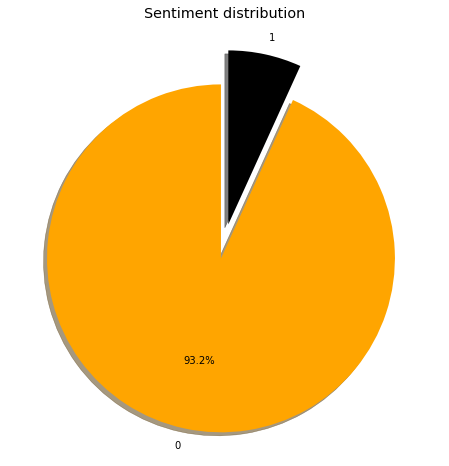

In [43]:
# pie chart

fig_2 = plt.figure(figsize = (8,8))
colors = ['orange', 'black']

keys = tweet_df['label'].value_counts()

# declaring exploding pie
explode = [0.1, 0.1]

keys.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors, startangle = 90,
          explode = explode, label = '')
plt.title('Sentiment distribution')

In [44]:
good_tweets = tweet_df[tweet_df.label == 0]
good_tweets.head(5)

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [45]:
vector = TfidfVectorizer(ngram_range = (1,2)).fit(tweet_df['tweet'])

In [46]:
features = vector.get_feature_names()
print('Number of features: {}\n'.format(len(features)))
print('First 10 features: \n{}'.format(features[:10]))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features: 208579

First 10 features: 
['0000001', '0000001 polluting', '00027', '00027 photooftheday', '001', '0035', '00h30', '01', '01 4995', '01 7900']


In [47]:
vector = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [48]:
features = vector.get_feature_names()
print('Number of features: {}\n'.format(len(features)))
print('First 10 features: \n{}'.format(features[:10]))

Number of features: 380305

First 10 features: 
['0000001', '0000001 polluting', '0000001 polluting niger', '00027', '00027 photooftheday', '00027 photooftheday music', '001', '0035', '00h30', '01']


🔴 Train and Test splitting

In [49]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # evaluation metrics.

In [50]:
X = tweet_df['tweet']
Y = tweet_df['label']
X = vector.transform(X)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123 )

In [52]:
x_train.shape

(23476, 380305)

In [53]:
x_test.shape

(5869, 380305)

🟠 Model training and using Logistic Regression for classification

In [54]:
# Implementing the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

Accuracy of the model is: 93.32083830294769 % 




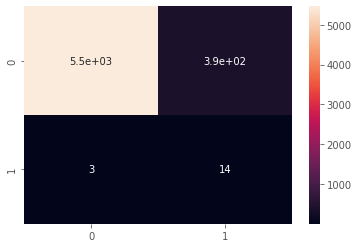

In [56]:
# Visualizing the classification model 

from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy of the model is: {} % \n\n'.format(100 * accuracy_score(Y_pred, y_test)))

c_matrix = confusion_matrix(Y_pred, y_test)
sns.heatmap(c_matrix, annot = True)

In [57]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5466
           1       0.82      0.03      0.07       403

    accuracy                           0.93      5869
   macro avg       0.88      0.52      0.52      5869
weighted avg       0.93      0.93      0.90      5869



🔵 Hyperparameter tuning using GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [63]:
grid_parameter = {'C' : [100, 10, 1.0, 0.01], 'solver' :['newton-cg', 'ldfgs', 'libliner']}
grid = GridSearchCV(LogisticRegression(), grid_parameter, cv = 5)
grid.fit(x_train, y_train)

print("Cross validation score is: {} % \n".format(100 * (grid.best_score_)))
print("Best parameters:", grid.best_params_)

Cross validation score is: 95.07582552753753 % 

Best parameters: {'C': 100, 'solver': 'newton-cg'}


In [64]:
Y_pred = grid.predict(x_test)

In [66]:
logreg_accuracy = accuracy_score(Y_pred, y_test)
print("Test accuracy: {} %".format(100 * logreg_accuracy))

Test accuracy: 95.45067302777305 %


In [67]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5466
           1       0.95      0.35      0.52       403

    accuracy                           0.95      5869
   macro avg       0.95      0.68      0.75      5869
weighted avg       0.95      0.95      0.94      5869

